In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [8]:
def my_er(w, y, x):    
    return (y.T-w @x.T) @ (y.T-w @x.T).T


In [9]:
y = np.array(data['Height'])
x = np.array(data['Weight'])

In [10]:
n = np.shape(x)[0]
ones = np.reshape(np.ones(n),(n,1))
x = np.reshape(x,(n,1))
x = np.hstack((x,ones))

In [11]:
y = np.reshape(y,(n,1))

In [12]:
from scipy.optimize import minimize
bnds = ((-5, 5), (-100, 100))
res = minimize(lambda a: my_er(a, y, x), method = 'L-BFGS-B', x0 = (0, 0))
res

      fun: array([[67545.28708647]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.068394  , 0.00145519])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 75
      nit: 7
   status: 0
  success: True
        x: array([ 0.08200642, 57.57178527])

In [13]:
res.x

array([ 0.08200642, 57.57178527])

Text(0, 0.5, 'Height')

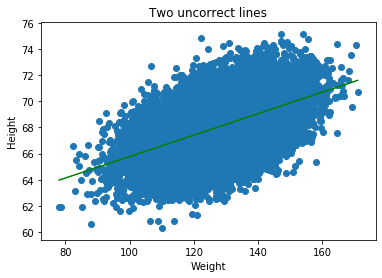

In [14]:
x1 = np.linspace(min(data['Weight']), max(data['Weight']))
w0, w1 = res.x[1], res.x[0]
y1 = w0 + w1*x1
plt.plot(x1, y1, color = 'green')
plt.scatter(y = data['Height'], x = data['Weight'])
plt.title('Two uncorrect lines')
plt.xlabel('Weight')
plt.ylabel('Height')